In [1]:
import pandas as pd
import numpy as np

In [2]:
from datasets import load_dataset

HF_USERNAME = "LukeGPT88"
PROJECT_NAME = "patient-doctor-text-classifier"
SUB_PROJECT_NAME = "eng"
DATASET_NAME = f"{HF_USERNAME}/{PROJECT_NAME}-{SUB_PROJECT_NAME}-dataset"
TASK = f"{PROJECT_NAME}-{SUB_PROJECT_NAME}"

In [3]:
dataset = load_dataset(DATASET_NAME)

In [4]:
id2label = {0: "PATIENT", 1: "DOCTOR", 2: "NEUTRAL"}

def mapping(idx):
  label = id2label.get(idx)
  return label

## FOR OLD DATASET ONLY (HF repo patient-doctor-text-classifier-eng-dataset-old)

### Convert short texts in neutral conversations

In [5]:
# label_train_text = list(map(mapping, dataset['train']['Label']))
# label_val_text = list(map(mapping, dataset['validation']['Label']))
# label_test_text = list(map(mapping, dataset['test']['Label']))

In [6]:
df_train = pd.DataFrame({'Text': dataset['train']['Text'], 'Label': dataset['train']['Label'], 'Encoding': dataset['train']['Encoding'] })
df_val = pd.DataFrame({'Text': dataset['validation']['Text'], 'Label': dataset['validation']['Label'], 'Encoding': dataset['validation']['Encoding'] })
df_test = pd.DataFrame({'Text': dataset['test']['Text'], 'Label': dataset['test']['Label'], 'Encoding': dataset['test']['Encoding'] })

In [7]:
# df_train.to_csv('df_train_old.csv')
# df_val.to_csv('df_val_old.csv')
# df_test.to_csv('df_test_old.csv')

In [8]:
SHORT_TEXT_LENGTH = 10
df_train['Short Text'] = [True if len(text) < SHORT_TEXT_LENGTH else False for text in df_train['Text'].values]
df_val['Short Text'] = [True if len(text) < SHORT_TEXT_LENGTH else False for text in df_val['Text'].values]
df_test['Short Text'] = [True if len(text) < SHORT_TEXT_LENGTH else False for text in df_test['Text'].values]

In [9]:
# df_val['Text'].loc[df_val['Short Text'] == True].to_csv('df_val')

### Train set

In [10]:
# we need to convert short expressions to be classified as neutral conversions
# matches all the patterns that are similar to the requested word
import re

texts = df_train['Text'].loc[ (df_train['Short Text'] == True) ]
indexes = df_train['Text'].loc[ (df_train['Short Text'] == True) ].index

words = ['uhm', 'ok', 'no', 'uh', 'sure', 'mmm']
text_to_convert = []
rows_to_convert = []
for text, index in list(map(lambda x, y: (x, y), texts,indexes.values)):
  for word in words:

    regex_pattern = r"\W*\w*" + re.escape(word) + r'\W*\w*'

    matches = re.findall(regex_pattern, text, re.IGNORECASE)
    if len(matches) > 0 :
      rows_to_convert.append(index)
      text_to_convert.append([matches[0], index])
print(len(rows_to_convert))
print(len(list(set(rows_to_convert))))
print(text_to_convert)


2106
1877
[['No?', 31], ['. OK.', 41], ['No. OK', 41], ['No.', 50], ['No.', 62], ['No.', 65], ['OK, sure', 72], [', sure.', 72], ['No.', 77], ['No.', 90], ['No.', 98], ['No.', 105], ['No.', 148], ['Uhm, no', 154], [', no.', 154], ['Uhm', 154], ['No.', 186], ['No.', 190], ['No.', 198], ['No.', 240], ['No.', 243], [' no.', 254], ['Uh no', 254], ['No.', 256], ['No.', 271], ['No.', 277], ['No.', 297], ['No.', 324], ['Nope', 331], ['No.', 339], ['OK.', 345], ['No.', 373], ['No.', 417], ['No.', 424], ['No.', 429], ['No.', 433], ['Uhm, no', 434], [', no.', 434], ['Uhm', 434], ['No.', 456], ['No.', 474], ['No.', 483], ['No.', 487], ['No.', 490], ['Uhm, no', 492], [', no.', 492], ['Uhm', 492], ['No.', 502], ['Okay', 515], ['No.', 523], ['No.', 543], ['No.', 547], ['Nope', 553], ['No.', 570], ['No.', 594], ['OK, yeah', 602], ['No.', 623], ['No.', 633], ['Nothing', 646], ['No.', 665], ['No.', 682], ['No.', 685], ['No.', 699], ['No.', 712], ['No.', 716], ['No.', 725], ['No.', 726], ['No.', 737], [

In [11]:
df_train.iloc[list(set(rows_to_convert))][df_train['Label'].isin(['DOCTOR'])]

/tmp/ipykernel_38617/1557300949.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_train.iloc[list(set(rows_to_convert))][df_train['Label'].isin(['DOCTOR'])]


,Text,Label,Encoding,Short Text


In [12]:
df_train.iloc[list(set(rows_to_convert)), df_train.columns.get_loc('Label')] = 'NEUTRAL'
df_train.iloc[list(set(rows_to_convert)), df_train.columns.get_loc('Encoding')] = 2

### Validation set

In [13]:
# we need to convert short expressions to be classified as neutral conversions
# matches all the patterns that are similar to the requested word
import re

texts = df_val['Text'].loc[ (df_val['Short Text'] == True) ]
indexes = df_val['Text'].loc[ (df_val['Short Text'] == True) ].index

words = ['uhm', 'ok', 'no', 'uh', 'sure', 'mmm']
text_to_convert = []
rows_to_convert = []
for text, index in list(map(lambda x, y: (x, y), texts,indexes.values)):
  for word in words:

    regex_pattern = r"\W*\w*" + re.escape(word) + r'\W*\w*'

    matches = re.findall(regex_pattern, text, re.IGNORECASE)
    if len(matches) > 0 :
      rows_to_convert.append(index)
      text_to_convert.append([matches[0], index])
print(len(rows_to_convert))
print(len(list(set(rows_to_convert))))
print(text_to_convert)

782
696
[['No.', 8], ['No.', 26], ['No.', 34], ['OK.', 47], [', none', 49], ['Uh, none', 49], ['No.', 53], ['OK.', 68], ['No.', 74], ['Nope', 87], ['No.', 98], ['No.', 99], ['No.', 100], ['No.', 107], ['No.', 110], ['No.', 117], ['No.', 139], ['No.', 147], ['No.', 189], ['No.', 192], ['No.', 199], ['No.', 206], ['No.', 226], ['No.', 237], ['OK,', 238], ['No.', 248], ['No.', 260], [' No.', 267], ['Uh No', 267], ['No.', 276], ['No.', 277], ['No.', 295], ['No.', 304], ['No.', 314], ['No.', 315], ['No.', 343], ['No.', 344], ['No.', 349], ['No.', 361], ['No.', 377], ['No.', 393], ['No.', 398], ['OK.', 405], ['No.', 422], ['No.', 448], ['Nope', 456], ['Nope', 458], [' no.', 462], ['Uh no', 462], ['Nope', 467], ['No.', 469], [', nope', 471], ['Uh, nope', 471], ['No.', 480], ['No.', 511], [' no.', 513], ['Uh no', 513], ['No.', 524], ['No.', 535], ['No.', 559], ['No.', 563], ['No.', 588], [', no.', 605], ['Uh, no', 605], ['No.', 610], ['No.', 611], ['no.', 614], ['No.', 620], ['No.', 624], ['OK

In [14]:
df_val.iloc[list(set(rows_to_convert))][df_val['Label'].isin(['DOCTOR'])]

/tmp/ipykernel_38617/2501460008.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_val.iloc[list(set(rows_to_convert))][df_val['Label'].isin(['DOCTOR'])]


,Text,Label,Encoding,Short Text


In [15]:
df_val.iloc[list(set(rows_to_convert)), df_val.columns.get_loc('Label')] = 'NEUTRAL'
df_val.iloc[list(set(rows_to_convert)), df_val.columns.get_loc('Encoding')] = 2

### test set

In [16]:
# we need to convert short expressions to be classified as neutral conversions
# matches all the patterns that are similar to the requested word
import re

texts = df_test['Text'].loc[ (df_test['Short Text'] == True) ]
indexes = df_test['Text'].loc[ (df_test['Short Text'] == True) ].index

words = ['uhm', 'ok', 'no', 'uh', 'sure', 'mmm']
text_to_convert = []
rows_to_convert = []
for text, index in list(map(lambda x, y: (x, y), texts,indexes.values)):
  for word in words:

    regex_pattern = r"\W*\w*" + re.escape(word) + r'\W*\w*'

    matches = re.findall(regex_pattern, text, re.IGNORECASE)
    if len(matches) > 0 :
      rows_to_convert.append(index)
      text_to_convert.append([matches[0], index])
print(len(rows_to_convert))
print(len(list(set(rows_to_convert))))
print(text_to_convert)

711
645
[['Mmm', 2], ['No.', 3], ['No.', 20], ['No.', 25], ['Uhm, no', 41], [', no.', 41], ['Uhm', 41], ['No.', 50], ['No.', 51], ['No.', 73], ['No.', 85], ['No.', 104], ['No.', 141], ['No.', 154], ['No.', 170], ['OK.', 193], ['No.', 196], ['No.', 210], ['No.', 236], ['No.', 256], [', no.', 289], ['Uh, no', 289], ['No.', 294], [', no.', 309], ['Nope', 333], [' no.', 339], ['No.', 349], ['Nope', 362], ['No.', 367], ['No.', 375], ['No.', 393], [', no.', 414], ['No.', 422], ['No.', 429], ['No.', 437], ['No.', 459], [', no.', 469], ['No.', 473], [', no.', 475], ['No.', 499], ['OK.', 500], ['No.', 537], ['No.', 541], ['Mmm', 546], ['No.', 548], ['No.', 555], ['No.', 565], ['No.', 570], ['No.', 588], ['No.', 590], ['No.', 611], ['No.', 633], ['No.', 650], ['No.', 676], ['OK.', 707], ['No.', 722], ['No.', 728], ['No.', 740], [' nope', 744], ['Uh nope', 744], [', no.', 750], ['Uh, no', 750], ['No.', 755], ['No.', 756], ['No.', 763], ['No.', 767], ['No.', 781], ['No.', 803], ['No.', 813], ['No.

In [17]:
df_test.iloc[list(set(rows_to_convert)), df_test.columns.get_loc('Label')] = 'NEUTRAL'
df_test.iloc[list(set(rows_to_convert)), df_test.columns.get_loc('Encoding')] = 2

### Convert Dataframes to CSV files

In [18]:
df_train.to_csv('df_train.csv')
df_val.to_csv('df_val.csv')
df_test.to_csv('df_test.csv')

## From Pandas Dataframe To The HF Dataset

In [19]:
df_train.drop('Short Text', axis=1, inplace=True)
df_val.drop('Short Text', axis=1, inplace=True)
df_test.drop('Short Text', axis=1, inplace=True)

In [20]:
from datasets import Dataset, DatasetDict
new_ds = DatasetDict()

new_ds['train'] = Dataset.from_pandas(df_train)
new_ds['validation'] = Dataset.from_pandas(df_val)
new_ds['test'] = Dataset.from_pandas(df_test)

print(new_ds)

DatasetDict({
    train: Dataset({
        features: ['Text', 'Label', 'Encoding'],
        num_rows: 24746
    })
    validation: Dataset({
        features: ['Text', 'Label', 'Encoding'],
        num_rows: 8249
    })
    test: Dataset({
        features: ['Text', 'Label', 'Encoding'],
        num_rows: 8249
    })
})


### HF Login & Dataset Push

In [21]:
from huggingface_hub import notebook_login

notebook_login()

In [22]:
new_ds

DatasetDict({
    train: Dataset({
        features: ['Text', 'Label', 'Encoding'],
        num_rows: 24746
    })
    validation: Dataset({
        features: ['Text', 'Label', 'Encoding'],
        num_rows: 8249
    })
    test: Dataset({
        features: ['Text', 'Label', 'Encoding'],
        num_rows: 8249
    })
})

In [23]:
new_ds.push_to_hub(DATASET_NAME)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/25 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/981 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/LukeGPT88/patient-doctor-text-classifier-eng-dataset/commit/b7a8a24652aaa4b702044a0c6648246ec1ce7517', commit_message='Upload dataset', commit_description='', oid='b7a8a24652aaa4b702044a0c6648246ec1ce7517', pr_url=None, pr_revision=None, pr_num=None)

## Memory Size For Texts

In [24]:
import sys

size_in_bytes = []

for text in new_ds['train']['Text']:
  size_in_bytes.append(sys.getsizeof(text) - sys.getsizeof(""))

print(f"Total Size of text strings: {sum(size_in_bytes)} bytes")
print(f"Average Size for each string: {sum(size_in_bytes)/len(new_ds['train']['Text'])} bytes")

Total Size of text strings: 2798520 bytes
Average Size for each string: 113.08979228966298 bytes


## Adding the Classification Score Field

In [25]:
from transformers import pipeline
classifier = pipeline("text-classification", model=f"{HF_USERNAME}/{TASK}", top_k=None)

/home/luca/anaconda3/envs/HF/lib/python3.10/site-packages/torch/cuda/__init__.py:628: UserWarning: Can't initialize NVML
  warnings.warn("Can't initialize NVML")


In [32]:
pred_score_list = []
pred_list = []
for text in dataset['test']['Text']:
  res = classifier(text)
  pred_score_list.append(res[0])
  pred_list.append(res[0]['label'])

print(pred_score_list)

[{'label': 'DOCTOR', 'score': 0.9997432827949524}, {'label': 'DOCTOR', 'score': 0.9996976852416992}, {'label': 'NEUTRAL', 'score': 0.9993240833282471}, {'label': 'NEUTRAL', 'score': 0.9998699426651001}, {'label': 'DOCTOR', 'score': 0.9996703863143921}, {'label': 'NEUTRAL', 'score': 0.9996292591094971}, {'label': 'DOCTOR', 'score': 0.9996610879898071}, {'label': 'PATIENT', 'score': 0.9992368221282959}, {'label': 'NEUTRAL', 'score': 0.999889612197876}, {'label': 'PATIENT', 'score': 0.9993724226951599}, {'label': 'PATIENT', 'score': 0.9993539452552795}, {'label': 'PATIENT', 'score': 0.9993307590484619}, {'label': 'NEUTRAL', 'score': 0.9998975992202759}, {'label': 'NEUTRAL', 'score': 0.9998960494995117}, {'label': 'DOCTOR', 'score': 0.9997346997261047}, {'label': 'NEUTRAL', 'score': 0.9998295307159424}, {'label': 'PATIENT', 'score': 0.9993645548820496}, {'label': 'PATIENT', 'score': 0.9922040700912476}, {'label': 'PATIENT', 'score': 0.9986741542816162}, {'label': 'NEUTRAL', 'score': 0.9998

In [33]:
df_test['Classification Score'] = pred_score_list

In [34]:
df_train['Classification Score'] = [[{'label': 'PATIENT', 'score': float(0)}, {'label': 'DOCTOR', 'score': float(0)}, {'label': 'NEUTRAL', 'score': float(0)}]] * len(df_train.index)
df_val['Classification Score'] = [[{'label': 'PATIENT', 'score': float(0)}, {'label': 'DOCTOR', 'score': float(0)}, {'label': 'NEUTRAL', 'score': float(0)}]] * len(df_val.index)

## Confusion Matrix

In [35]:
from transformers import pipeline
classifier = pipeline("text-classification", model=f"{HF_USERNAME}/{TASK}")

In [36]:
true_list = list(map(mapping, dataset['test']['Encoding']))

In [37]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Plot a confusion matrix.
# cm is the confusion matrix, names are the names of the classes.
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(names))
  plt.xticks(tick_marks, names, rotation=45)
  plt.yticks(tick_marks, names)
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.986  0.0023 0.0117]
 [0.0011 0.9938 0.0051]
 [0.0102 0.0068 0.9831]]


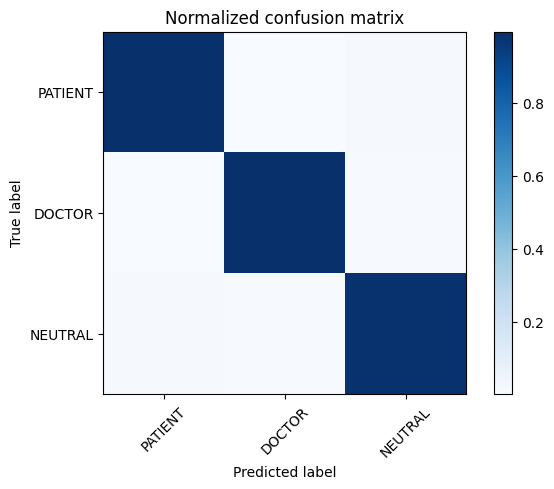

In [38]:
import numpy as np
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(true_list, pred_list)
np.set_printoptions(precision=4)

# Normalize the confusion matrix by row (i.e by the number of samples
# in each class)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print('Normalized confusion matrix')
print(cm_normalized)
plt.figure()
plot_confusion_matrix(cm_normalized, id2label.values(), title='Normalized confusion matrix')

plt.show()

In [39]:
from sklearn.metrics import precision_recall_fscore_support

macro = precision_recall_fscore_support(true_list, pred_list, average='macro')
micro = precision_recall_fscore_support(true_list, pred_list, average='micro')

print(f'Macro : {macro}\n Micro : {micro}')

Macro : (0.9871043382910534, 0.9876265734212293, 0.9873600138060667, None)
 Micro : (0.9886046793550733, 0.9886046793550733, 0.9886046793550733, None)
